<a href="https://colab.research.google.com/github/sabrinadvep/introduction_to_machine_learning/blob/main/Session_2_Data_Preprocessing_and_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Identifying missing values in tabular data
di Buku Python Machine Learning di Bab 4

In [ ]:
import pandas as pd
from io import StringIO

In [ ]:
 csv_data = \
    '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,'''
# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

# Eliminating samples or features with missing values

In [ ]:
#  rows with missing values can be easily dropped via the dropna method:
# df.dropna(axis=0) remove column
df=df.dropna(axis=1) #remove row

In [ ]:
# only drop rows where all columns are NaN
# (returns the whole array here since we don't
# have a row with where all values are NaN
df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# drop rows that have less than 4 real values
df.dropna(thresh=4)

In [ ]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

In [ ]:
# change NaN value to 0
df.fillna(0, inplace=True)
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,0.0,8.0
2,10.0,11.0,12.0,0.0


In [ ]:
from sklearn.preprocessing import Imputer

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/__init__.py)

#Mapping categorical data
To make sure that the learning algorithm interprets the ordinal features correctly,
we need to convert the categorical string values into integers.

In [ ]:
import pandas as pd
df = pd.DataFrame([
['green', 'M', 10.1, 'class1'],
['red', 'L', 13.5, 'class2'],
['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


nominal feature (color), an ordinal feature (size), and a numerical feature (price) column.

In [ ]:
size_mapping = {
    'XL':3,
    'L':2,
    'M':1}

In [ ]:
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


If we want to transform the integer values back to the original string representation at a later stage, we can simply define a reverse-mapping dictionary

In [ ]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)axi
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


# Encoding class labels

In [ ]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

Next, we can use the mapping dictionary to transform the class labels into integers:

In [ ]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


We can reverse the key-value pairs in the mapping dictionary as follows to map the
converted class labels back to the original string representation:

In [ ]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


Alternatively, there is a convenient LabelEncoder class directly implemented in
scikit-learn to achieve this:

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

Note that the *fit_transform* method is just a shortcut for calling *fit* and
`transform` separately, and we can use the *inverse_transform* method to transform
the integer class labels back into their original string representation

In [ ]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

#Feature scaling.

Normalization using min-max scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms = MinMaxScaler()

In [ ]:
X_train_norm = mms.fit_transform(X_train)

In [ ]:
X_train_norm = mms.transform(X_test)

Standardization

Similar to the MinMaxScaler class, scikit-learn also implements a class for
standardization:

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stdsc = StandardScaler()

In [ ]:
X_train_std = stdsc.fit_transform(X_train)

In [ ]:
X_test_std = stdsc.transform(X_test)

**NOTES**: We fit the StandardScaler class only once on the training data and use those parameters to transform the test set or any new data point.

Manually

In [ ]:
ex = np.array([0, 1, 2, 3, 4, 5])

In [ ]:
print('standardized:', (ex - ex.mean()) / ex.std())

standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [ ]:
print('normalized:', (ex - ex.min()) / (ex.max() - ex.min()))

normalized: [0.  0.2 0.4 0.6 0.8 1. ]


#Partitioning a dataset into separate training and test sets

In [ ]:
# https://archive.ics.uci.edu/dataset/109/wine

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

In [ ]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
'machine-learning-databases/wine/wine.data',
 header=None)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [ ]:
X_train, X_test, y_train, y_test =\
train_test_split(X, y,
test_size=0.3,
random_state=0,
stratify=y)



1.   Assigned the NumPy array representation of the feature columns 1-13 to the variable X; we assigned the class labels from the first column to the variable y.
2.   We used the *train_test_split* function to randomly split X and y into separate training and test datasets.
3. By setting *test_size=0.3* we assigned 30% of the wine samples to X_test and y_test, and the remaining 70% of the samples were assigned to X_train and y_train, respectively.
4. Providing the class label array y as an argument to stratify ensures that both training and test datasets have the same class proportions as the original dataset.



#Implementing linear regression using Scikit-Learn.

In [ ]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-3rd-edition/'
                 'master/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

#Visualizing the important characteristics of a dataset

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

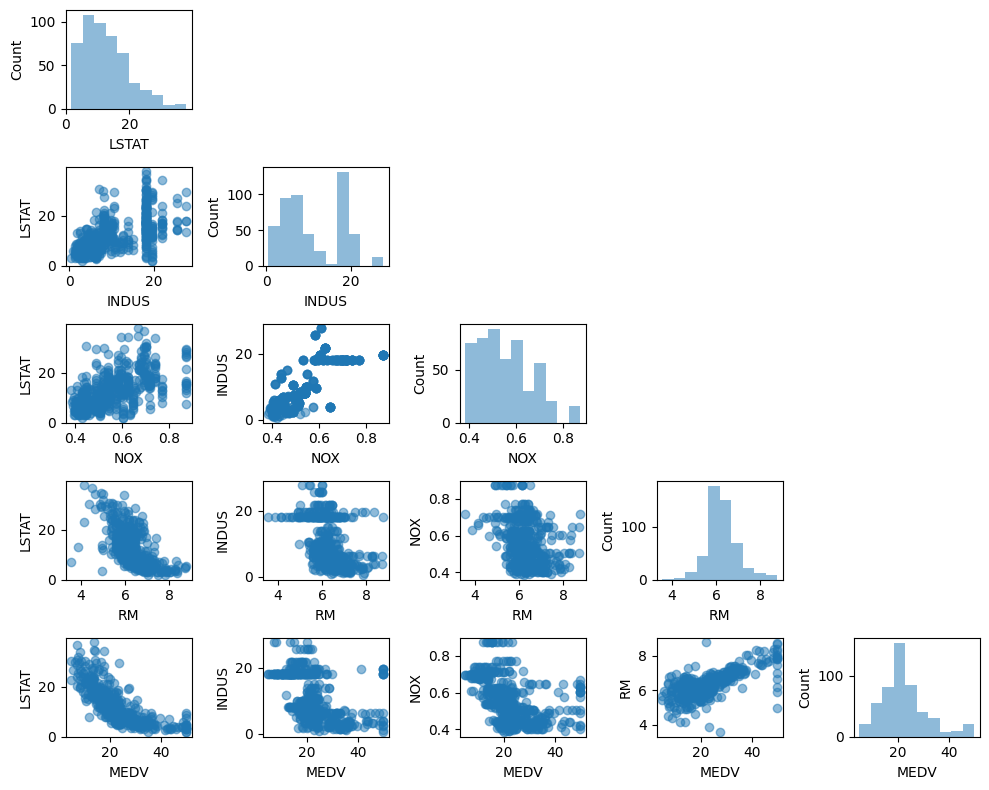

In [ ]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

scatterplotmatrix(df[cols].values, figsize=(10, 8),
                  names=cols, alpha=0.5)
plt.tight_layout()
#plt.savefig('images/10_03.png', dpi=300)
plt.show()

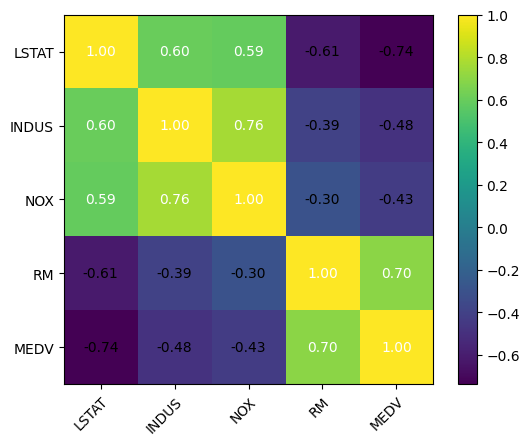

In [ ]:
import numpy as np
from mlxtend.plotting import heatmap


cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

#Implementing an ordinary least squares linear regression model

Solving regression for regression parameters with gradient descent (GD)

In [ ]:
import numpy as np

In [ ]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [ ]:
X = df[['RM']].values
y = df['MEDV'].values

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [ ]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

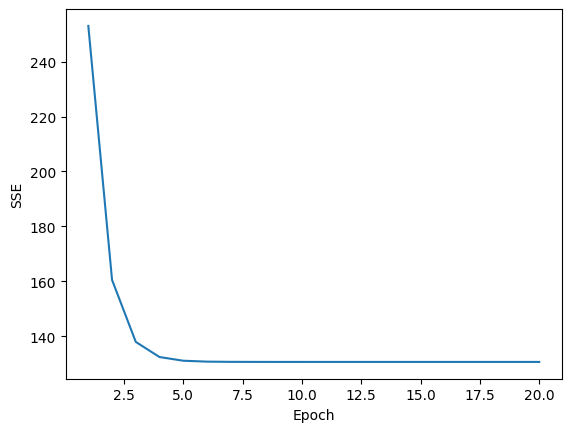

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

As we can see in the following plot, the GD algorithm converged after the fifth epoch

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

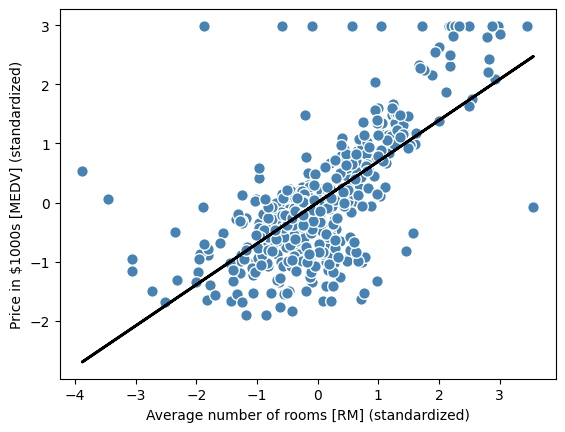

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [ ]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [ ]:
from distutils.version import LooseVersion
import sklearn


num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)

if LooseVersion(sklearn.__version__) >= LooseVersion('0.23.0'):
    print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std[:, np.newaxis]).flatten())
else:
    print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


<ipython-input-59-bd4df7f8a786>:8: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(sklearn.__version__) >= LooseVersion('0.23.0'):
<ipython-input-59-bd4df7f8a786>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std[:, np.newaxis]).flatten())


In this code example, we used the previously trained linear regression model to predict the price of a house with five rooms. According to our model, such a house is worth $10,840.

On a side note, it is also worth mentioning that we technically don't have to update
the weights of the intercept if we are working with standardized variables since the y-axis intercept is always 0 in those cases. We can quickly confirm by printing the weights:

#Estimating coefficient of a regression model via scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


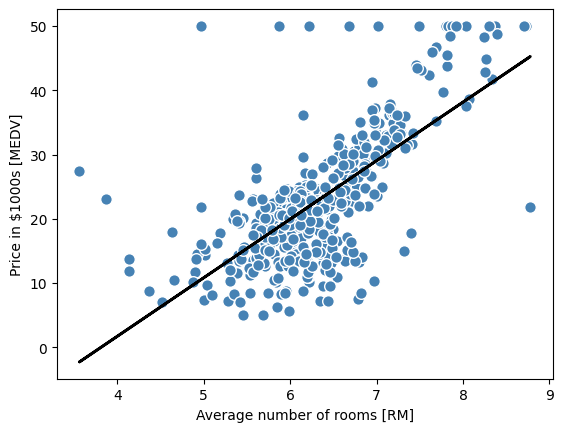

In [ ]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

Normal Equations alternative:

In [ ]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


# Fitting a robust regression model using RANSAC (RANdom SAmple Consensus)

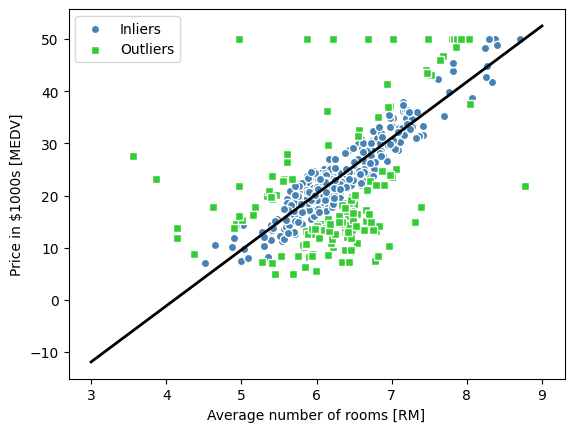

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [ ]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


#Evaluating the performance of linear regression models

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


**MSE** = Mean Squared Error -> Averaged value of the SSE cost that we minimized to fit the linear regression model. The MSE is useful to compare different regression models or for tuning their parameters via grid search and cross-validation, as it normalizes the SSE by the sample size.

**R^2** = Coefficient of determinations -> Standardized version of the MSE, for better interpretability of the model's performance. Or in other words, R^2 is the fraction of response variance that is captured by the model.

Bounded between 0 and 1, can be negative.

If R^2 = 1 the model fits the data perfectly with a corresponding MSE = 0.